# Claim Optimization Assessment

## 1. Importing Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
dt = pd.read_csv("dataBinary.csv",encoding ='latin1') 
dt.head()

,Sector,Entidad,Dependencia,Tema,Subtema,Localidad,Canal,TipoPeticion,EstadoInicial,EstadoFinal,dayFFFV
0,Movilidad,Secretaria Movilidad,Direccion De Servicio Al Ciudadano,Movilidad Transporte Malla Vial,Solicitud Operativos Control Del Transito Del ...,Sin Dato,E-Mail,Derecho De Peticion De Interes General,Registro Con Preclasificacion,Solucionado Por Asignacion,1
1,Gestion Publica,Secretaria General,Central De Peticiones Distrito Capital,Funcion Publica Administracion,Traslado A Entidades Distritales,Sin Dato,Web,Derecho De Peticion De Interes Particular,Registro Sin Preclasificacion,Solucionado Por Traslado,1
2,Gestion Publica,Secretaria General,Central De Peticiones Distrito Capital,Funcion Publica Administracion,Traslado A Entidades Distritales,Sin Dato,Web,Derecho De Peticion De Interes Particular,Registro Sin Preclasificacion,Solucionado Por Traslado,1
3,Gestion Publica,Secretaria General,Central De Peticiones Distrito Capital,Funcion Publica Administracion,Traslado A Entidades Distritales,Kennedy,Web,Derecho De Peticion De Interes Particular,Registro Sin Preclasificacion,Solucionado Por Traslado,1
4,Gestion Publica,Secretaria General,Central De Peticiones Distrito Capital,Funcion Publica Administracion,Traslado A Entidades Distritales,Sin Dato,Web,Queja,Registro Sin Preclasificacion,Solucionado Por Traslado,1


In [235]:
#listing the name of attributes
list(dt.columns.values)

['Sector',
 'Entidad',
 'Dependencia',
 'Tema',
 'Subtema',
 'Localidad',
 'Canal',
 'TipoPeticion',
 'EstadoInicial',
 'EstadoFinal',
 'dayFFFV']

In [20]:
dt.shape

(159448, 11)

In [2]:
dt.Sector,labelSector=pd.factorize(dt.Sector)
dt.Entidad,labelEntidad=pd.factorize(dt.Entidad)
dt.Dependencia,labelDependencia=pd.factorize(dt.Dependencia)
dt.Tema,labelTema=pd.factorize(dt.Tema)
dt.Subtema,labelSubtema=pd.factorize(dt.Subtema)
dt.Localidad,labelLocalidad=pd.factorize(dt.Localidad)
dt.Canal,labelCanal=pd.factorize(dt.Canal)
dt.TipoPeticion,labelTipoPeticion=pd.factorize(dt.TipoPeticion)
dt.EstadoInicial,labelEstadoInicial=pd.factorize(dt.EstadoInicial)
dt.EstadoFinal,labelEstadoFinal=pd.factorize(dt.EstadoFinal)


## Plot Imbalanced datasets

On time : 152184
Dalayed : 7264
Proportion: 0.05 : 1


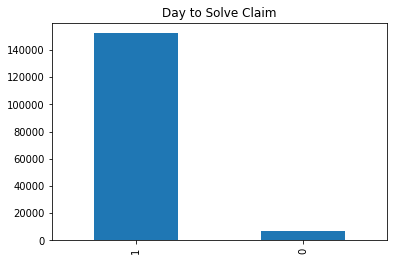

In [3]:
dayFFFV_count = dt.dayFFFV.value_counts()
print('On time :', dayFFFV_count[1])
print('Dalayed :', dayFFFV_count[0])
print('Proportion:', round(dayFFFV_count[0] / dayFFFV_count[1], 2), ': 1')

dayFFFV_count.plot(kind='bar', title='Day to Solve Claim')

### Random over-sampling for Solving Imbalance Dataset

In [4]:

from collections import Counter
# Class count
count_class_1,count_class_0 = dt.dayFFFV.value_counts()

# Divide by class
df_class_0 = dt[dt['dayFFFV'] == 0]
df_class_1 = dt[dt['dayFFFV'] == 1]


df_class_1_under = df_class_1.sample(count_class_0)
df_under = pd.concat([df_class_0,df_class_1_under], axis=0)

print('Random under-sampling:')
print(df_under.dayFFFV.value_counts())



Random under-sampling:
1    7264
0    7264
Name: dayFFFV, dtype: int64


In [12]:
X=df_under.loc[:,['Sector','Entidad','Dependencia','Tema','Subtema','Localidad',
 'Canal','TipoPeticion','EstadoInicial','EstadoFinal']]
Y=df_under.loc[:,['dayFFFV']]

## Feauture Importance Model

C:\Users\dsaav\Anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\dsaav\Anaconda3\envs\py37\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\dsaav\Anaconda3\envs\py37\lib\site-packages\yellowbrick\base.py:359: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


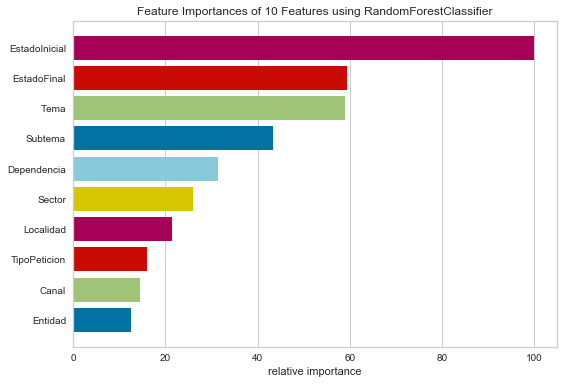

In [6]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)

# Fit and show the feature importances
viz.fit(X, Y)
viz.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.33, random_state=234)

## Neural Network Model

In [8]:
import keras
from keras.models import Model, Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras import optimizers

Using TensorFlow backend.


In [18]:
def ComplNet():
    compl=Sequential()
    compl.add(Dense(500,input_shape=(10,),activation='relu'))
    compl.add(Dense(480,activation='relu'))
    compl.add(Dense(430,activation='relu'))
    compl.add(Dense(385,activation='relu'))
    compl.add(Dense(359,activation='relu'))
    compl.add(Dense(291,activation='relu'))
    compl.add(Dense(246,activation='relu'))
    compl.add(Dense(209,activation='relu'))
    compl.add(Dense(191,activation='relu'))
    compl.add(Dense(140,activation='relu'))
    compl.add(Dense(111,activation='relu'))
    compl.add(Dense(58,activation='relu'))
    compl.add(Dense(13,activation='relu'))
    compl.add(Dense(1,activation='sigmoid'))

    compl.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    
    return compl


Train on 9732 samples, validate on 4794 samples
Epoch 1/40
9732/9732 [==============================] - 2s 186us/step - loss: 0.5788 - accuracy: 0.7093 - val_loss: 0.4028 - val_accuracy: 0.8246
Epoch 2/40
9732/9732 [==============================] - 1s 113us/step - loss: 0.3759 - accuracy: 0.8285 - val_loss: 0.3532 - val_accuracy: 0.8509
Epoch 3/40
9732/9732 [==============================] - 1s 121us/step - loss: 0.3458 - accuracy: 0.8401 - val_loss: 0.3420 - val_accuracy: 0.8488
Epoch 4/40
9732/9732 [==============================] - 1s 115us/step - loss: 0.3182 - accuracy: 0.8454 - val_loss: 0.3091 - val_accuracy: 0.8567
Epoch 5/40
9732/9732 [==============================] - 1s 117us/step - loss: 0.3100 - accuracy: 0.8502 - val_loss: 0.3268 - val_accuracy: 0.8421
Epoch 6/40
9732/9732 [==============================] - 1s 115us/step - loss: 0.3050 - accuracy: 0.8572 - val_loss: 0.3070 - val_accuracy: 0.8634
Epoch 7/40
9732/9732 [==============================] - 1s 115us/step - loss

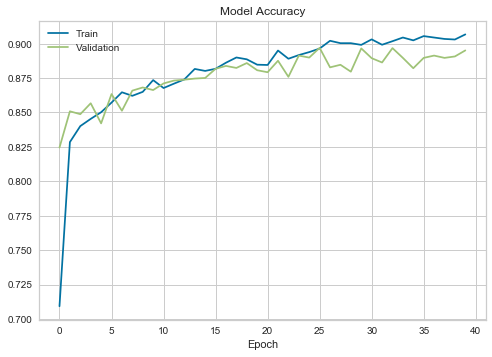

In [285]:
history=compl.fit(X_train,Y_train,
                 epochs=40,
                 batch_size=150,validation_data=(X_test,Y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy by %')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

### K Fold Cross Validation

In [26]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score


NnCompl = KerasClassifier(build_fn=ComplNet, 
                                 epochs=40, 
                                 batch_size=150, 
                                 verbose=0)


Score=cross_val_score(NnCompl, X, Y, cv=10)

In [30]:

print('Estimated Accuracy %.3f ' % (np.mean(Score)))

Estimated Accuracy 0.867 


In [270]:
print('Minimun Loss: ',min(history.history['val_loss']),
      '\nMaximun Loss: ',max(history.history['val_loss']),
     '\nAfter ', np.argmin(history.history['val_loss']), 'epochs')

Minimun Loss:  0.23127739015822119 
Maximun Loss:  0.3890788934854453 
After  38 epochs


### Confusion Matrix

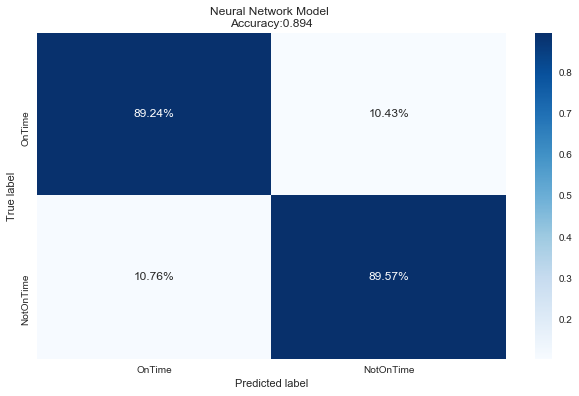

In [272]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns

y_pred = compl.predict(X_test)
y_pred=(y_pred > 0.5)

cm = confusion_matrix(Y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['OnTime','NotOnTime'], 
                     columns =['OnTime','NotOnTime'])
plt.figure(figsize=(10.5,6))
sns.heatmap(cm_df/np.sum(cm_df), annot=True,fmt='.2%', cmap='Blues')
plt.title('Neural Network Model \nAccuracy:{0:.3f}'.format(accuracy_score(Y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [210]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

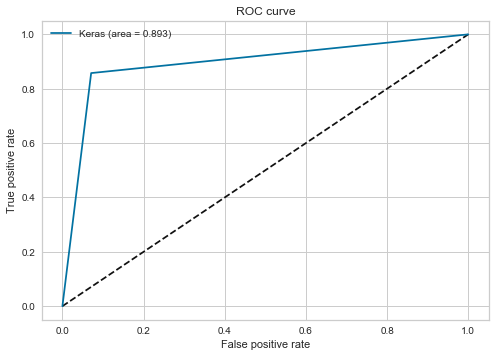

In [274]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()



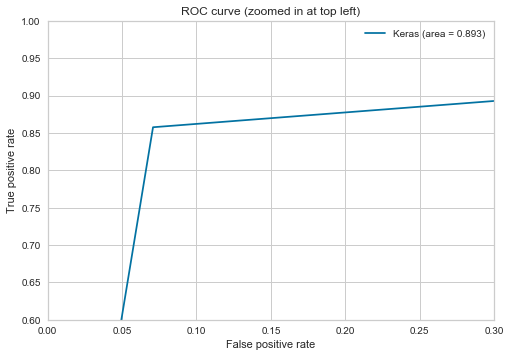

In [275]:
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.3)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)

C:\Users\dsaav\Anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dsaav\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### K Fold Cross Validation

In [40]:
accuracy = cross_val_score(logmodel, X, Y, cv=10,scoring='accuracy')
np.mean(accuracy)

C:\Users\dsaav\Anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dsaav\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dsaav\Anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

0.8383111127542712

### Confusion Matrix

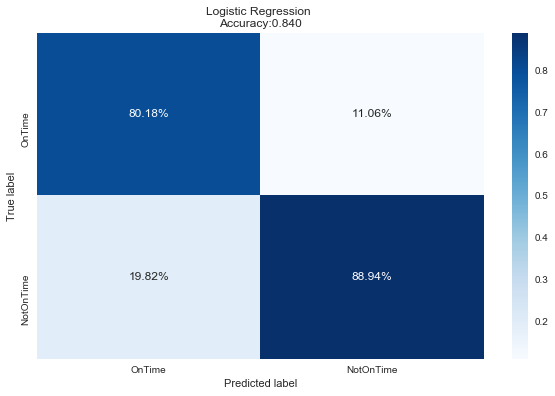

In [278]:
from sklearn.metrics import accuracy_score
import seaborn as sns
# Creates a confusion matrix
cm = confusion_matrix(Y_test, predictions)


# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['OnTime','NotOnTime'], 
                     columns =['OnTime','NotOnTime'])

plt.figure(figsize=(10,6))
sns.heatmap(cm_df/np.sum(cm_df), annot=True,fmt='.2%', cmap='Blues')
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(Y_test, predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()